# INFO 4900 — Week One

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import re

## Preparing Data

In [2]:
# Load data
polls = gpd.read_feather("data/polling_station_coords.feather")
districts = gpd.read_file("data/Uganda_Districts-2020---136-wgs84.zip")
names = pd.read_feather("data/names_with_kingdoms.feather")

## Descriptive Statistics: polling_station_coords.feather

In [3]:
# Preview dataframe
polls.head()

,PS_name,PS_code,VoteReg_district_name,VoteReg_district_code,VoteReg_county_name,VoteReg_county_code,VoteReg_subcounty_name,VoteReg_subcounty_code,VoteReg_parish_code,VoteReg_parish_name,...,FDC_Registered,Turnout,REG_VOTERS,YOWERI_KAGUTA_MUSEVENI,KIZZA_BESIGYE_KIFEFE,VALID_VOTES,village_mean_distance,villages,lat_lon,points
0,ADYEDA CENTRE,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.115523,0.671480,277.0,144.0,32.0,182.0,2285.087273,ADYEDA IMALO;ANYWAL;ATAKARA;,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
1,APORWEGI P/S,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.146724,0.646724,702.0,283.0,103.0,430.0,1127.896277,ADYEDA IMALO;ANYWAL;APORWEGI AATAKARA,"[2.058047456592412, 32.72281709757338]",POINT (32.72282 2.05805)
2,ADYEDA IMALO,3,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.137072,0.753894,321.0,190.0,44.0,238.0,1921.654206,ADYEDA IMALO;ANYWAL,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
3,ALIRA B,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.266055,0.694954,872.0,328.0,232.0,584.0,1695.521839,AKOT A;AKOT B;AKWODONG B;AKWOYO;ALIRA A;ALIRA ...,"[2.0821059545915097, 32.761479779076204]",POINT (32.76148 2.08211)
4,AKOT A,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.344000,0.682667,750.0,218.0,258.0,504.0,1653.587131,AKOT A;AKOT B;AKWODONG A;AKWODONG B;AKWOYO;ALI...,"[2.042473960840479, 32.742188123783855]",POINT (32.74219 2.04247)


In [4]:
# Number of polling stations
len(polls.groupby("PS_name"))

26817

In [5]:
# Number of districts
len(polls.groupby("VoteReg_district_code"))

112

In [6]:
# Number of county names
len(polls.groupby("VoteReg_county_name"))

240

In [7]:
# Number of county codes
len(polls.groupby("VoteReg_county_code"))

290

In [8]:
# Number of sub-county names
len(polls.groupby("VoteReg_subcounty_name"))

1283

In [9]:
# Number of sub-county codes
len(polls.groupby("VoteReg_subcounty_code"))

19

In [10]:
# Number of parish names
len(polls.groupby("VoteReg_parish_name"))

6377

In [11]:
# Number of parish codes
len(polls.groupby("VoteReg_parish_code"))

107

In [12]:
# Number of villages
polls_villages = polls['villages'].str.split(';', expand=True).add_prefix('village_').replace([None], [''], regex=True)
len(np.unique(polls_villages[['village_0',
                              'village_1',
                              'village_2',
                              'village_3',
                              'village_4',
                              'village_5',
                              'village_6',
                              'village_7',
                              'village_8',
                              'village_9',
                              'village_10',
                              'village_11',
                              'village_12',
                              'village_13',
                              'village_14',
                              'village_15',
                              'village_16',
                              'village_17',
                              'village_18',
                              'village_19',
                              'village_20',
                              'village_21',
                              'village_22',
                              'village_23',
                              'village_24',
                              'village_25',
                             ]].values))

39632

In [13]:
# Number of polling stations by district
print(polls.groupby("VoteReg_district_name").PS_name.count())

# Median number of polling stations per district
print('Median polling station count per district: ' + str(polls.groupby("VoteReg_district_code").PS_name.count().median()))

VoteReg_district_name
ABIM            60
ADJUMANI       125
AGAGO          177
ALEBTONG       176
AMOLATAR       129
              ... 
SSEMBABULE     219
TORORO         411
WAKISO        1359
YUMBE          202
ZOMBO          192
Name: PS_name, Length: 112, dtype: int64
Median polling station count per district: 195.5


## Sanitizing Text: polling_station_coords.feather

In [14]:
# Previewing dataframe
polls.head()

,PS_name,PS_code,VoteReg_district_name,VoteReg_district_code,VoteReg_county_name,VoteReg_county_code,VoteReg_subcounty_name,VoteReg_subcounty_code,VoteReg_parish_code,VoteReg_parish_name,...,FDC_Registered,Turnout,REG_VOTERS,YOWERI_KAGUTA_MUSEVENI,KIZZA_BESIGYE_KIFEFE,VALID_VOTES,village_mean_distance,villages,lat_lon,points
0,ADYEDA CENTRE,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.115523,0.671480,277.0,144.0,32.0,182.0,2285.087273,ADYEDA IMALO;ANYWAL;ATAKARA;,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
1,APORWEGI P/S,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.146724,0.646724,702.0,283.0,103.0,430.0,1127.896277,ADYEDA IMALO;ANYWAL;APORWEGI AATAKARA,"[2.058047456592412, 32.72281709757338]",POINT (32.72282 2.05805)
2,ADYEDA IMALO,3,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.137072,0.753894,321.0,190.0,44.0,238.0,1921.654206,ADYEDA IMALO;ANYWAL,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
3,ALIRA B,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.266055,0.694954,872.0,328.0,232.0,584.0,1695.521839,AKOT A;AKOT B;AKWODONG B;AKWOYO;ALIRA A;ALIRA ...,"[2.0821059545915097, 32.761479779076204]",POINT (32.76148 2.08211)
4,AKOT A,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.344000,0.682667,750.0,218.0,258.0,504.0,1653.587131,AKOT A;AKOT B;AKWODONG A;AKWODONG B;AKWOYO;ALI...,"[2.042473960840479, 32.742188123783855]",POINT (32.74219 2.04247)


In [15]:
# Stripping whitespace
polls['PS_name'] = polls['PS_name'].str.strip()

In [16]:
# Lowering case
polls['PS_name'] = polls['PS_name'].str.lower()

In [17]:
# Removing special characters
polls['PS_name'] = polls['PS_name'].str.replace('[^\w\s]', '', True)

/var/folders/33/qp5k0v8128136rvjkr63g0x00000gn/T/ipykernel_37412/2074057513.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  polls['PS_name'] = polls['PS_name'].str.replace('[^\w\s]', '', True)


In [18]:
# Second look at dataframe
polls.head()

,PS_name,PS_code,VoteReg_district_name,VoteReg_district_code,VoteReg_county_name,VoteReg_county_code,VoteReg_subcounty_name,VoteReg_subcounty_code,VoteReg_parish_code,VoteReg_parish_name,...,FDC_Registered,Turnout,REG_VOTERS,YOWERI_KAGUTA_MUSEVENI,KIZZA_BESIGYE_KIFEFE,VALID_VOTES,village_mean_distance,villages,lat_lon,points
0,adyeda centre,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.115523,0.671480,277.0,144.0,32.0,182.0,2285.087273,ADYEDA IMALO;ANYWAL;ATAKARA;,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
1,aporwegi ps,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.146724,0.646724,702.0,283.0,103.0,430.0,1127.896277,ADYEDA IMALO;ANYWAL;APORWEGI AATAKARA,"[2.058047456592412, 32.72281709757338]",POINT (32.72282 2.05805)
2,adyeda imalo,3,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.137072,0.753894,321.0,190.0,44.0,238.0,1921.654206,ADYEDA IMALO;ANYWAL,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
3,alira b,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.266055,0.694954,872.0,328.0,232.0,584.0,1695.521839,AKOT A;AKOT B;AKWODONG B;AKWOYO;ALIRA A;ALIRA ...,"[2.0821059545915097, 32.761479779076204]",POINT (32.76148 2.08211)
4,akot a,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.344000,0.682667,750.0,218.0,258.0,504.0,1653.587131,AKOT A;AKOT B;AKWODONG A;AKWODONG B;AKWOYO;ALI...,"[2.042473960840479, 32.742188123783855]",POINT (32.74219 2.04247)


## Descriptive Statistics: names_with_kingdoms.feather

In [19]:
# Preview dataframe
names.head()

,Unnamed: 0,appid_receipt_num,constituency,constituency_num,date_of_birth,district,district_num,other_name,parish,parish_num,polling_station,polling_station_num,sex,sub_county,sub_county_num,surname,village,voter_num,d_names,region
0,0,1206420000MP6/CF8407,KWANIA COUNTY,2,26-12-1984,Apac,1,CHRISTINE,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABANG,ANYWAL,61281069,Apac,Lango
1,1,0906720000RKU/CF4900,KWANIA COUNTY,2,10-05-1949,Apac,1,BITU,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABEJA,ATAKARA,58687089,Apac,Lango
2,2,1025320003CZW/CM910,KWANIA COUNTY,2,07-07-1991,Apac,1,JACOB,ADYEDA,1,ADYEDA CENTRE,1,M,ADUKU,1,ABILI,ADYEDA IMALO,55386251,Apac,Lango
3,3,1328720001XLP/CF8200,KWANIA COUNTY,2,16-03-1982,Apac,1,JENIFFER,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABUNI,ANYWAL,64284712,Apac,Lango
4,4,0906720000UV6/CF7500,KWANIA COUNTY,2,05-05-1975,Apac,1,EVALINE,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABWOLI,ATAKARA,63056778,Apac,Lango


In [20]:
# Number of polling station names
len(names.groupby("polling_station"))

22214

In [21]:
# Number of districts
len(names.groupby("district"))

112

In [22]:
# Number of county names
len(names.groupby("constituency"))

282

In [23]:
# Number of county codes
len(names.groupby("constituency_num"))

283

In [24]:
# Number of sub-county names
len(names.groupby("sub_county"))

1316

In [25]:
# Number of sub-county codes
len(names.groupby("sub_county_num"))

19

In [26]:
# Number of parish names
len(names.groupby("parish"))

6350

In [27]:
# Number of parish codes
len(names.groupby("parish_num"))

107

In [28]:
# Number of villages
len(names.groupby("village"))

41122

In [29]:
# Number of polling stations by district
print(names.groupby("district").nunique()['polling_station'])

# Median number of polling stations per district
print('Median polling station count per district: ' + str(names.groupby("district").nunique()['polling_station'].median()))

district
Abim           56
Adjumani      117
Agago         167
Alebtong      165
Amolatar      110
             ... 
Ssembabule    204
Tororo        360
Wakiso        548
Yumbe         194
Zombo         173
Name: polling_station, Length: 112, dtype: int64
Median polling station count per district: 176.0


## Sanitizing Text: names_with_kingdoms.feather

In [30]:
# Previewing dataframe
names.head()

,Unnamed: 0,appid_receipt_num,constituency,constituency_num,date_of_birth,district,district_num,other_name,parish,parish_num,polling_station,polling_station_num,sex,sub_county,sub_county_num,surname,village,voter_num,d_names,region
0,0,1206420000MP6/CF8407,KWANIA COUNTY,2,26-12-1984,Apac,1,CHRISTINE,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABANG,ANYWAL,61281069,Apac,Lango
1,1,0906720000RKU/CF4900,KWANIA COUNTY,2,10-05-1949,Apac,1,BITU,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABEJA,ATAKARA,58687089,Apac,Lango
2,2,1025320003CZW/CM910,KWANIA COUNTY,2,07-07-1991,Apac,1,JACOB,ADYEDA,1,ADYEDA CENTRE,1,M,ADUKU,1,ABILI,ADYEDA IMALO,55386251,Apac,Lango
3,3,1328720001XLP/CF8200,KWANIA COUNTY,2,16-03-1982,Apac,1,JENIFFER,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABUNI,ANYWAL,64284712,Apac,Lango
4,4,0906720000UV6/CF7500,KWANIA COUNTY,2,05-05-1975,Apac,1,EVALINE,ADYEDA,1,ADYEDA CENTRE,1,F,ADUKU,1,ABWOLI,ATAKARA,63056778,Apac,Lango


In [31]:
# Stripping whitespace
names['polling_station'] = names['polling_station'].str.strip()

In [32]:
# Lowering case
names['polling_station'] = names['polling_station'].str.lower()

In [33]:
# Removing special characters
names['polling_station'] = names['polling_station'].str.replace('[^\w\s]', '', True)

/var/folders/33/qp5k0v8128136rvjkr63g0x00000gn/T/ipykernel_37412/820029302.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  names['polling_station'] = names['polling_station'].str.replace('[^\w\s]', '', True)


In [34]:
# Second look at dataframe
names.head()

,Unnamed: 0,appid_receipt_num,constituency,constituency_num,date_of_birth,district,district_num,other_name,parish,parish_num,polling_station,polling_station_num,sex,sub_county,sub_county_num,surname,village,voter_num,d_names,region
0,0,1206420000MP6/CF8407,KWANIA COUNTY,2,26-12-1984,Apac,1,CHRISTINE,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABANG,ANYWAL,61281069,Apac,Lango
1,1,0906720000RKU/CF4900,KWANIA COUNTY,2,10-05-1949,Apac,1,BITU,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABEJA,ATAKARA,58687089,Apac,Lango
2,2,1025320003CZW/CM910,KWANIA COUNTY,2,07-07-1991,Apac,1,JACOB,ADYEDA,1,adyeda centre,1,M,ADUKU,1,ABILI,ADYEDA IMALO,55386251,Apac,Lango
3,3,1328720001XLP/CF8200,KWANIA COUNTY,2,16-03-1982,Apac,1,JENIFFER,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABUNI,ANYWAL,64284712,Apac,Lango
4,4,0906720000UV6/CF7500,KWANIA COUNTY,2,05-05-1975,Apac,1,EVALINE,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABWOLI,ATAKARA,63056778,Apac,Lango


## Salient Questions/Comments

1. Although both datasets were collected in 2016, their polling station, county, parish, and village counts seem to differ considerably. I plan to discuss how to reconcile these differences during the next meeting. 
2. I don't have the column descriptions and thusly do not quite understand how an administrative level code/number (ex. names['constituency_num']) differs from an administrative level itself. For example, while some administrative levels like districts have the same number of unique names as codes/numbers, most others do not have a one-to-one alignment.
3. Districts appear to be the most granular level of administration that both datasets agree on the number of. I'm a bit confused about why the datasets disagree on the number of counties—are there some counties that lack registered voters (and would therefore not be an index/row in the registration dataset)?

## Map of Polling Station Data

In [35]:
# Explore district data format
districts.head()

,dname2019,d,total2020,ttotal2020,2010,2016,2017,2018,2020,geometry
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993..."
1,BUTEBO,Butebo,"121,200",121200.0,PALLISA,BUTEBO,BUTEBO,BUTEBO,BUTEBO,"POLYGON ((33.87314 1.22742, 33.87306 1.22897, ..."
2,ALEBTONG,Alebtong,"266,100",266100.0,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,"POLYGON ((33.44290 2.36391, 33.44264 2.36336, ..."
3,TORORO,Tororo,"597,500",597500.0,TORORO,TORORO,TORORO,TORORO,TORORO,"POLYGON ((33.97873 0.57800, 33.97864 0.57808, ..."
4,MOROTO,Moroto,"118,500",118500.0,MOROTO,MOROTO,MOROTO,MOROTO,MOROTO,"POLYGON ((34.83133 2.16438, 34.83133 2.16438, ..."


<AxesSubplot:>

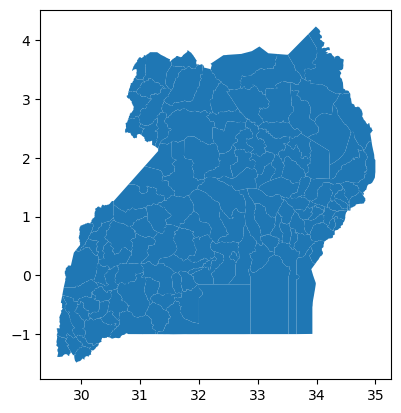

In [36]:
# Create a sample map
districts.plot()

In [37]:
# Spatially join polling and district datasets
joined_df = gpd.sjoin(districts, polls, how = "left", op = "intersects")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/33/qp5k0v8128136rvjkr63g0x00000gn/T/ipykernel_37412/1028104108.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined_df = gpd.sjoin(districts, polls, how = "left", op = "intersects")


In [38]:
# Explore joined data values
joined_df.head()

,dname2019,d,total2020,ttotal2020,2010,2016,2017,2018,2020,geometry,...,NRM_Registered,FDC_Registered,Turnout,REG_VOTERS,YOWERI_KAGUTA_MUSEVENI,KIZZA_BESIGYE_KIFEFE,VALID_VOTES,village_mean_distance,villages,lat_lon
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.259084,0.396524,0.733017,633.0,164.0,251.0,452.0,784.993681,KALAGALA;LWABIKERE;MULEMA,"[-0.28158847509456986, 31.77385129072259]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.213693,0.441909,0.695021,482.0,103.0,213.0,333.0,209.000000,KAYUNGA,"[-0.2785289074682445, 31.74929731060801]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.371795,0.311355,0.745421,546.0,203.0,170.0,386.0,413.977099,BUGABIRAKIYIMBWEKYALUGO;NDEGEYA,"[-0.27458103041014326, 31.726929432861564]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.334821,0.252232,0.649554,448.0,150.0,113.0,276.0,3515.906250,KAKO HILL;KAKO VILLAGE;NAMAKINDU,"[-0.27043467917998293, 31.81306674535471]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.331723,0.347826,0.698873,621.0,206.0,216.0,432.0,2694.376812,KINYERERE;LWANDA;NAKATOOKE,"[-0.2701900045230249, 31.7965600827924]"


In [39]:
# Group by district name and merge data 
count = joined_df.groupby("2016")["2016"].count()
count.name = "poll_count"
districts = pd.merge(left = districts, right = count, left_on = "2016", right_index = True)

0        Annotation(31.8556, -0.491258, 'MASAKA')
1          Annotation(33.9843, 1.18223, 'BUTEBO')
2        Annotation(33.2557, 2.26668, 'ALEBTONG')
3         Annotation(34.0822, 0.724974, 'TORORO')
4          Annotation(34.6316, 2.64869, 'MOROTO')
                          ...                    
124         Annotation(31.6614, -0.8062, 'RAKAI')
126       Annotation(31.3037, -0.707012, 'RAKAI')
125        Annotation(31.7027, 0.195672, 'GOMBA')
127    Annotation(30.1518, -0.483758, 'BUSHENYI')
128    Annotation(30.8777, -0.853239, 'ISINGIRO')
Length: 136, dtype: object

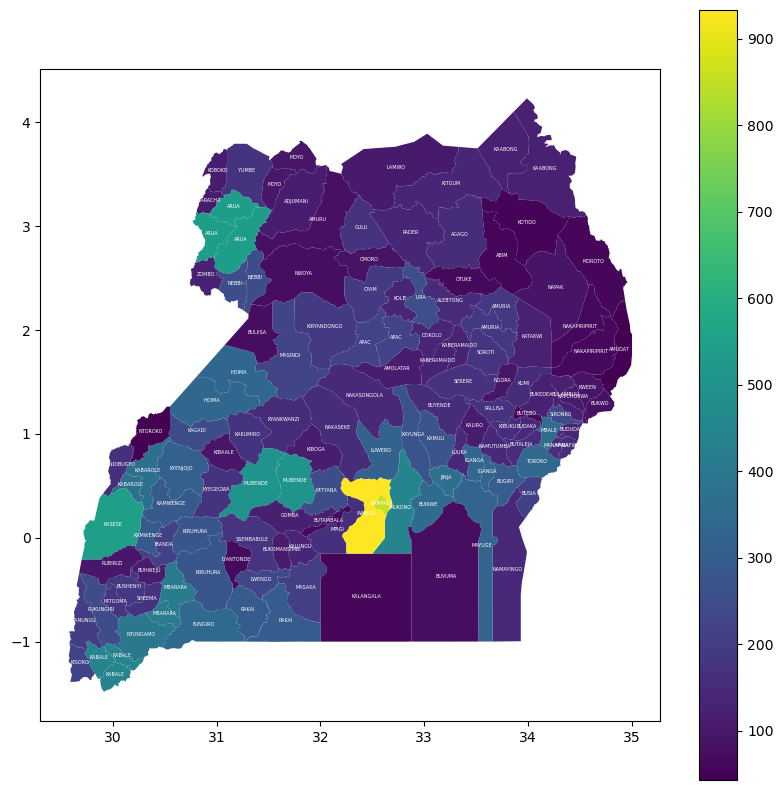

In [40]:
# Graph and add labels to districts
ax = districts.plot(column = "poll_count", cmap = "viridis", legend = True, figsize = (10,10))
districts.apply(lambda x: ax.annotate(text=x["2016"], xy = x.geometry.centroid.coords[0], ha = 'center', fontsize = 3.5, color = 'white'), axis = 1)

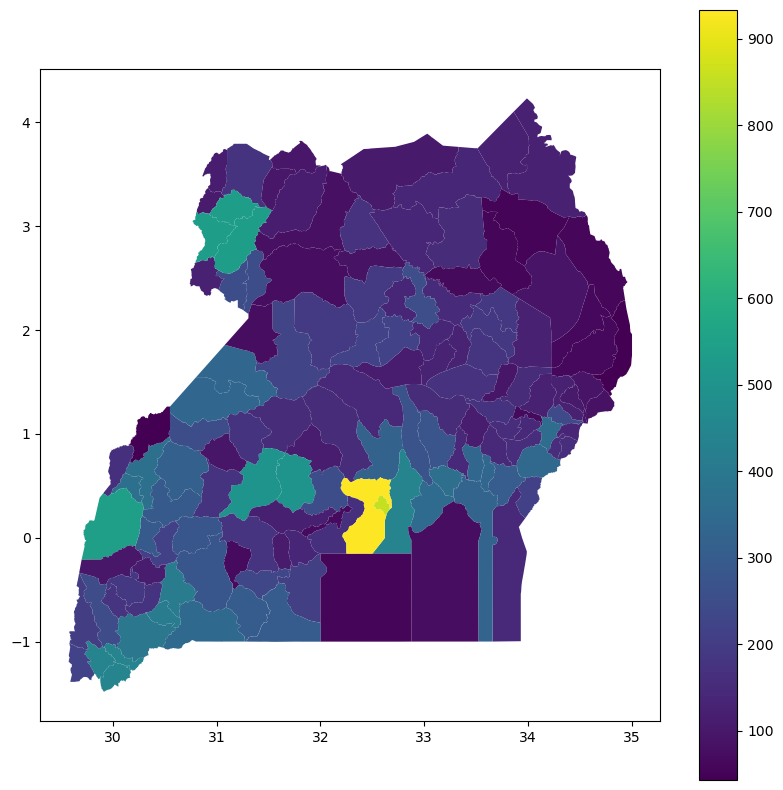

In [41]:
# Graph without district labels
ax = districts.plot(column = "poll_count", cmap = "viridis", legend = True, figsize = (10,10))